In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Indian_Kids_Screen_Time.csv')
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
#To check Null values
print("Checking Null Values")
print(data.isnull().sum())

Checking Null Values
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [4]:
print("Number of Duplicate Rows")
print(data.duplicated().sum())
#Dropping our duplicates datas in our dataset
data=data.drop_duplicates()

Number of Duplicate Rows
44


Correlation matrix
                                        Age  Avg_Daily_Screen_Time_hr  \
Age                                1.000000                  0.108873   
Avg_Daily_Screen_Time_hr           0.108873                  1.000000   
Exceeded_Recommended_Limit         0.150615                  0.657812   
Educational_to_Recreational_Ratio -0.488017                 -0.081445   

                                   Exceeded_Recommended_Limit  \
Age                                                  0.150615   
Avg_Daily_Screen_Time_hr                             0.657812   
Exceeded_Recommended_Limit                           1.000000   
Educational_to_Recreational_Ratio                   -0.120873   

                                   Educational_to_Recreational_Ratio  
Age                                                        -0.488017  
Avg_Daily_Screen_Time_hr                                   -0.081445  
Exceeded_Recommended_Limit                                 -0.120873  
Educa

Text(0.5, 1.0, 'Correlation of all numerical Columns')

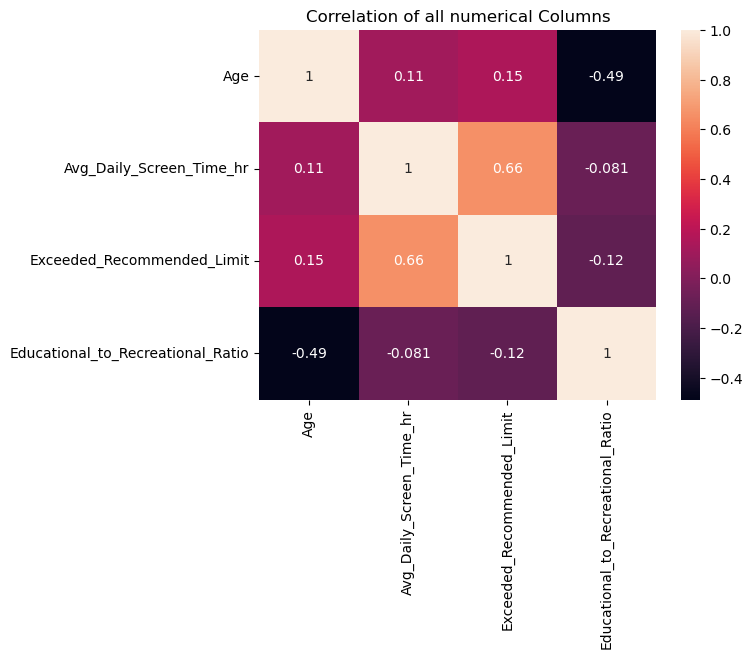

In [5]:
print("Correlation matrix")
correlation=data.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.title("Correlation of all numerical Columns")


In [6]:
print("Information of All Columns")
data.info()

Information of All Columns
<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 613.7+ KB


In [7]:
print("Data types of Each Columns")
print(data.dtypes)

Data types of Each Columns
Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


In [8]:
# Find the Interquartile Range
#we take only numerical values to find IQR
numerical_col = data.select_dtypes(include = ['int64', 'float64'])
Quan1=numerical_col.quantile(0.25)
Quan3=numerical_col.quantile(0.75)
iqr= Quan3-Quan1
print("IQR")
print(iqr)
#we can also find outliers using IQR
outlier = ((numerical_col>(Quan1 - 1.5 * iqr)) | (numerical_col >(Quan3 + 1.5 * iqr)))
print("Outliers")
print(outlier.sum())


IQR
Age                                  6.0000
Avg_Daily_Screen_Time_hr             1.9525
Educational_to_Recreational_Ratio    0.1100
dtype: float64
Outliers
Age                                  9668
Avg_Daily_Screen_Time_hr             9374
Educational_to_Recreational_Ratio    9668
dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Avg_Daily_Screen_Time_hr'),
  Text(2, 0, 'Exceeded_Recommended_Limit'),
  Text(3, 0, 'Educational_to_Recreational_Ratio')])

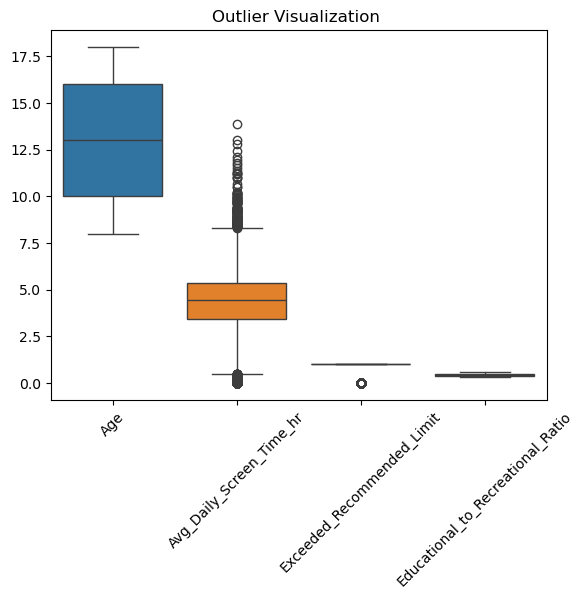

In [9]:
# To visualize the Outliers
sns.boxplot(data)
plt.title("Outlier Visualization ")
plt.xticks(rotation=45)

